In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date, datetime
from sklearn.linear_model import LinearRegression

In [2]:
ticker = "NFLX"
today = date.today()

prices = yf.download(ticker, 
                   start='2020-01-01', 
                   end=today, 
                   progress=False, auto_adjust=True)

prices.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,326.100006,329.980011,324.779999,329.809998,4485800
2020-01-03,326.779999,329.859985,325.529999,325.899994,3806900
2020-01-06,323.119995,336.359985,321.200012,335.829987,5663100
2020-01-07,336.470001,336.700012,330.299988,330.750000,4703200
2020-01-08,331.489990,342.700012,331.049988,339.260010,7104500


In [3]:
# Create Lag Array 
X = np.zeros(len(prices["Close"]) - 1)
y = np.array(prices["Close"][1:])

for i in range(len(X)):
    X[i] = prices["Close"][i]


In [4]:
reg = LinearRegression().fit(X.reshape(-1, 1), y)

print(reg.coef_)
print(reg.intercept_)

[0.99528613]
2.057259545587783


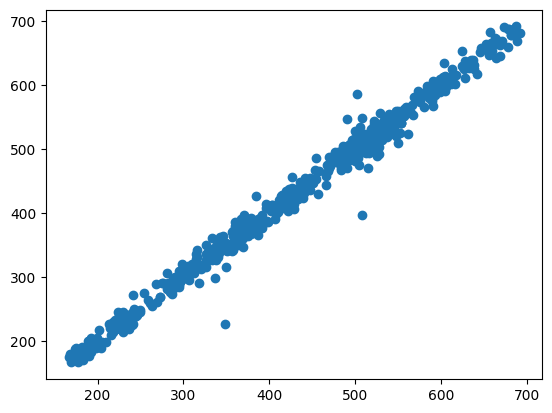

In [5]:
plt.scatter(X, y)

In [6]:
stock_series = np.array(prices["Close"])
predictions = reg.predict(X.reshape(-1, 1))

Text(0.5, 1.0, 'Time Series')

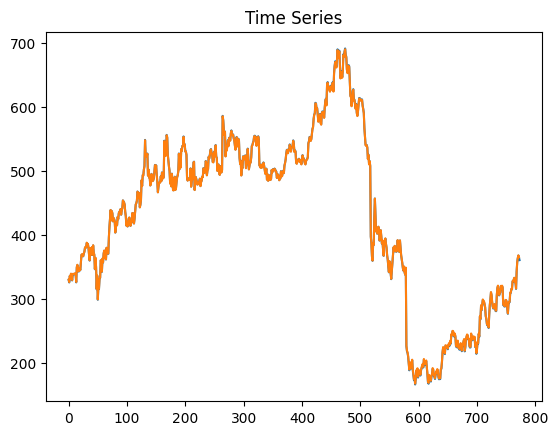

In [7]:
plt.plot(stock_series)
plt.plot(predictions)
plt.title("Time Series")

Text(0.5, 1.0, 'Residuals')

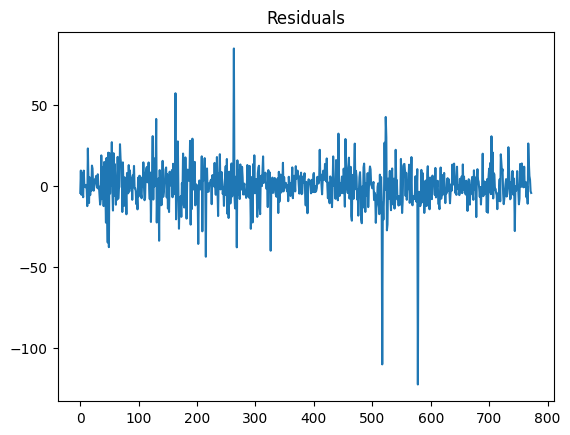

In [8]:
plt.plot(stock_series[1:] - predictions)
plt.title("Residuals")

## Residual White Noise 

#### The residual does not appear to be a white noise process. The variance does change. There are sharp spikes, but these are rare. 

## R Squared Value 

#### The R Squared is very high. It is 99.52%. 

#### Just because the R Squared is high, does not mean the model is robust !!

In [9]:
ticker = "NFLX"
today = date.today()

NFLX = yf.download(ticker, 
                   start='2020-01-01', 
                   end=today, 
                   interval = "1mo",
                   progress=False, auto_adjust=True)

NFLX.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,326.100006,359.850006,321.200012,345.089996,169874000
2020-02-01,347.239990,392.950012,346.279999,369.029999,114056000
2020-03-01,373.109985,393.519989,290.250000,375.500000,201979100
2020-04-01,376.049988,449.519989,357.510010,419.850006,225111600
2020-05-01,415.100006,458.970001,397.859985,419.730011,135055800


In [10]:
ticker = "META"
today = date.today()

META = yf.download(ticker, 
                   start='2020-01-01', 
                   end=today, 
                   interval = "1mo",
                   progress=False, auto_adjust=True)

META.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,206.750000,224.199997,201.059998,201.910004,347314600
2020-02-01,203.440002,218.770004,181.820007,192.470001,317547300
2020-03-01,194.029999,197.240005,137.100006,166.800003,649467700
2020-04-01,161.619995,209.690002,150.830002,204.710007,541334600
2020-05-01,201.600006,240.899994,198.759995,225.089996,509476500


## Initial Guesses

#### NFLX has a higher return, higher variance 

#### META has a lower return, lower variance 

In [11]:
L = len(META["Close"])
meta_log_returns = np.zeros(L - 1)
nflx_log_returns = np.zeros(L - 1)

for i in range(L - 1):
    meta_log_returns[i] = np.log(META["Close"][i+1] / META["Close"][i]) * 100
    nflx_log_returns[i] = np.log(NFLX["Close"][i+1] / NFLX["Close"][i]) * 100

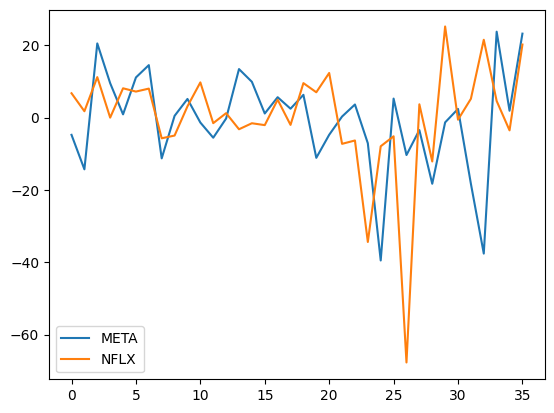

In [12]:
plt.plot(meta_log_returns, label = "META")
plt.plot(nflx_log_returns, label = "NFLX")
plt.legend(loc = "best")

In [13]:
meta_mean = np.mean(meta_log_returns)
nflx_mean = np.mean(nflx_log_returns)

print("META: ", meta_mean)
print("NFLX: ", nflx_mean)

META:  -0.7934819599681402
NFLX:  0.12343156598957232


In [14]:
meta_std = np.std(meta_log_returns)
nflx_std = np.std(nflx_log_returns)

print("META: ", meta_std)
print("NFLX: ", nflx_std)

META:  13.64472560731227
NFLX:  15.388773098473314


## Empirical Data (Log Returns)

#### NFLX does have a higher return 

#### NFLX does have a higher variance

In [15]:
L = len(META["Close"])
meta_returns = np.zeros(L - 1)
nflx_returns = np.zeros(L - 1)

for i in range(L - 1):
    meta_returns[i] = (META["Close"][i+1] - META["Close"][i]) / META["Close"][i] * 100
    nflx_returns[i] = (NFLX["Close"][i+1] - NFLX["Close"][i]) / NFLX["Close"][i] * 100

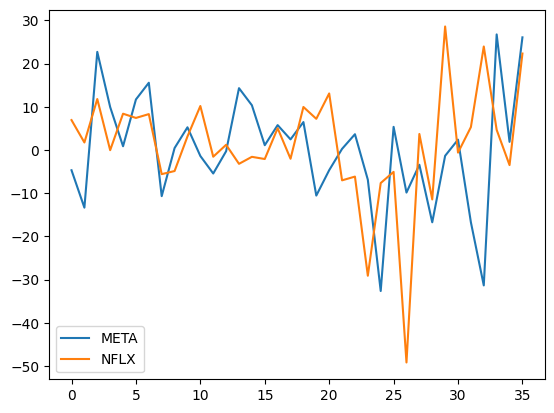

In [16]:
plt.plot(meta_returns, label = "META")
plt.plot(nflx_returns, label = "NFLX")
plt.legend(loc = "best")

In [17]:
meta_mean = np.mean(meta_returns)
nflx_mean = np.mean(nflx_returns)

print("META: ", meta_mean)
print("NFLX: ", nflx_mean)

META:  0.10465670507838157
NFLX:  1.1867204379259542


In [18]:
meta_std = np.std(meta_returns)
nflx_std = np.std(nflx_returns)

print("META: ", meta_std)
print("NFLX: ", nflx_std)

META:  13.02865675662035
NFLX:  13.347496866910703


## Empirical Data (Arithmetic Returns)

#### NFLX does have a higher return 

#### NFLX does have a higher variance, but it is not significant. 